<a href="https://colab.research.google.com/github/codingCapricorn/Machine-Learning-Implementations/blob/master/RNN_With_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##:::: Time-series data analysis using LSTM ::::

###Time-series prediction using LSTM recurrent neural network(RNN) with Keras


In [ ]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [ ]:
## Data can be downloaded from: http://archive.ics.uci.edu/ml/machine-learning-databases/00235/
#file 'household_power_consumption.txt' 

df = pd.read_csv('household_power_consumption.txt',sep=';',
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

ParserError: ignored

In [ ]:
df.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1485328 entries, 2006-12-16 17:24:00 to 2009-10-13 04:51:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1485328 non-null  float64
 1   Global_reactive_power  1485328 non-null  float64
 2   Voltage                1485328 non-null  float64
 3   Global_intensity       1485328 non-null  float64
 4   Sub_metering_1         1485328 non-null  float64
 5   Sub_metering_2         1485328 non-null  float64
 6   Sub_metering_3         1485328 non-null  float64
dtypes: float64(7)
memory usage: 90.7 MB


In [ ]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
df.shape

(1485328, 7)

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.485328e+06,1.485328e+06,1.485328e+06,1.485328e+06,1.485328e+06,1.485328e+06,1.485328e+06
mean,1.085553e+00,1.216527e-01,2.404983e+02,4.614729e+00,1.148076e+00,1.365138e+00,6.094011e+00
std,1.084842e+00,1.110129e-01,3.260359e+00,4.563437e+00,6.235748e+00,6.025610e+00,8.259896e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.980000e-01,4.600000e-02,2.386300e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.600000e-01,1.000000e-01,2.407100e+02,2.400000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.516000e+00,1.920000e-01,2.426100e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.539400e+02,4.840000e+01,8.200000e+01,7.800000e+01,3.100000e+01


In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
for j in range(1,7):
       print(df.iloc[:, j].unique())

[0.418      0.436      0.498      0.502      0.528      0.522
 0.52       0.51       0.47       0.478      0.398      0.422
 0.282      0.152      0.156      0.         0.076      0.09
 0.2        0.058      0.18       0.144      0.118      0.108
 0.202      0.192      0.186      0.116      0.136      0.148
 0.16       0.158      0.1        0.082      0.05       0.052
 0.162      0.086      0.048      0.054      0.068      0.166
 0.174      0.178      0.188      0.088      0.08       0.07
 0.084      0.074      0.106      0.092      0.064      0.046
 0.138      0.134      0.132      0.12       0.13       0.154
 0.078      0.142      0.14       0.146      0.15       0.17
 0.102      0.072      0.06       0.056      0.062      0.112
 0.066      0.172      0.168      0.194      0.184      0.096
 0.164      0.182      0.094      0.098      0.176      0.19
 0.204      0.22       0.198      0.208      0.244      0.334
 0.298      0.296      0.286      0.278      0.104      0.258
 0.238      

In [ ]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[]

In [ ]:
# filling nan with mean in any columns

for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [ ]:

# another sanity check to make sure that there are not more any nan
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.485328e+06,1.485328e+06,1.485328e+06,1.485328e+06,1.485328e+06,1.485328e+06,1.485328e+06
mean,1.085553e+00,1.216527e-01,2.404983e+02,4.614729e+00,1.148076e+00,1.365138e+00,6.094011e+00
std,1.084842e+00,1.110129e-01,3.260359e+00,4.563437e+00,6.235748e+00,6.025610e+00,8.259896e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.980000e-01,4.600000e-02,2.386300e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.600000e-01,1.000000e-01,2.407100e+02,2.400000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.516000e+00,1.920000e-01,2.426100e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.539400e+02,4.840000e+01,8.200000e+01,7.800000e+01,3.100000e+01


In [ ]:

df['Global_active_power'].resample('M').sum()

dt
2006-12-31    41817.624213
2007-01-31    69014.033107
2007-02-28    56491.057107
2007-03-31    58863.277553
2007-04-30    39222.980864
2007-05-31    44008.872000
2007-06-30    35729.506791
2007-07-31    29846.037480
2007-08-31    34120.342172
2007-09-30    41874.777107
2007-10-31    49278.541107
2007-11-30    55920.815107
2007-12-31    72605.255553
2008-01-31    65170.467553
2008-02-29    49334.328660
2008-03-31    55591.679553
2008-04-30    48209.992000
2008-05-31    45724.031107
2008-06-30    42945.057553
2008-07-31    35479.589107
2008-08-31    12344.051107
2008-09-30    42667.792000
2008-10-31    50743.138791
2008-11-30    59918.529980
2008-12-31    56910.986283
2009-01-31    62951.093553
2009-02-28    50291.565410
2009-03-31    54761.157107
2009-04-30    49277.695107
2009-05-31    45214.172213
2009-06-30    37129.733593
2009-07-31    27594.786213
2009-08-31    30043.631973
2009-09-30    42631.820660
2009-10-31    18674.263553
Freq: M, Name: Global_active_power, dtype: float64

#Data visualization

sum and mean of Global_active_power -->>

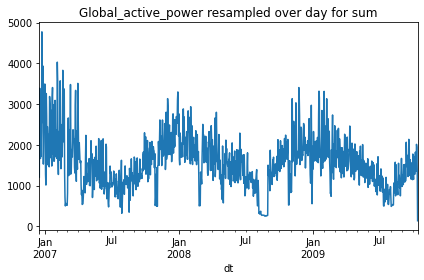

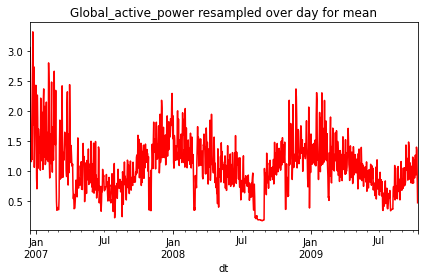

In [ ]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

Mean and std of 'Global_intensity' resampled over day -->>

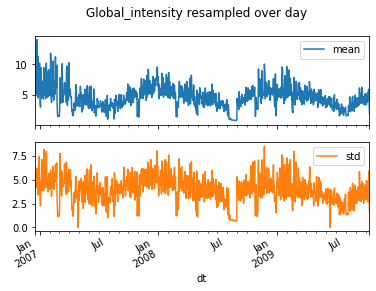

In [ ]:
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

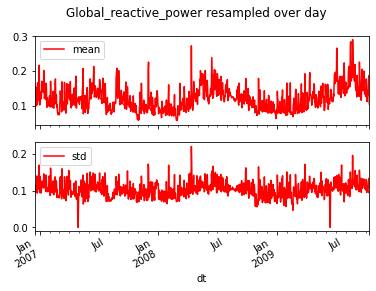

In [ ]:
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

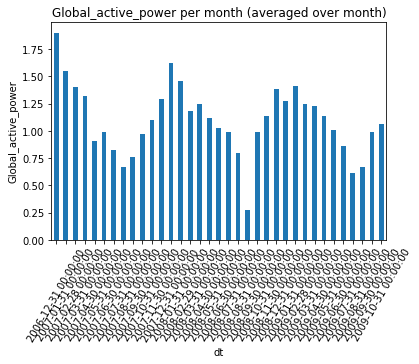

In [ ]:
# Sum of 'Global_active_power' resampled over month
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

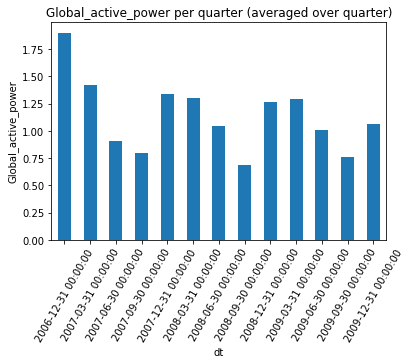

In [ ]:
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

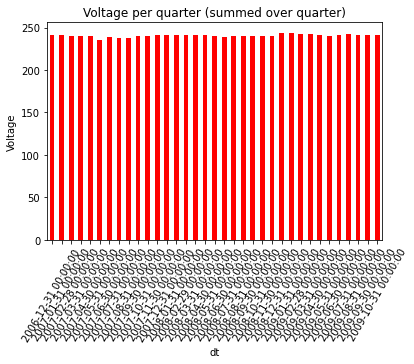

In [ ]:
df['Voltage'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

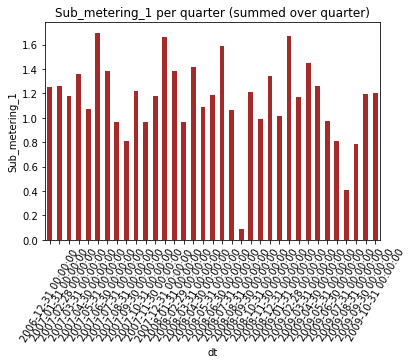

In [ ]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

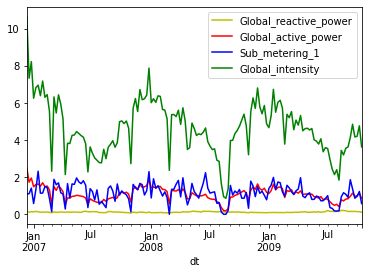

In [ ]:
## resampling over week and computing mean
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

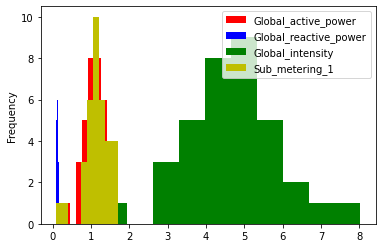

In [ ]:
# Below I show hist plot of the mean of different feature resampled over month 
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

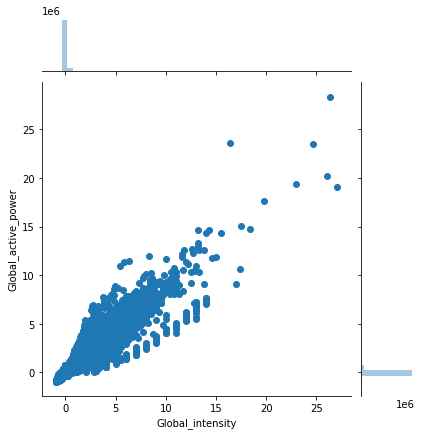

In [ ]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  

plt.show()

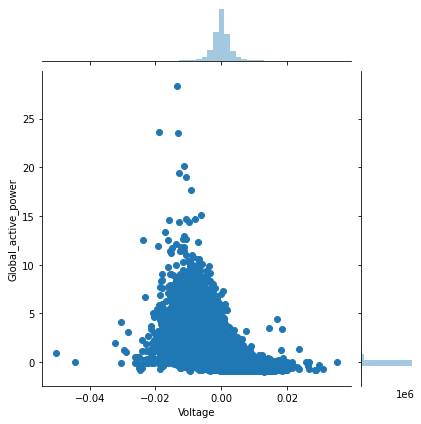

In [ ]:
## The correlations between 'Voltage' and  'Global_active_power'
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

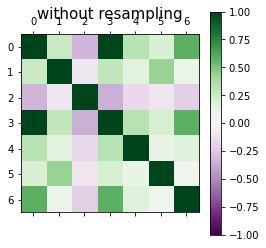

In [ ]:
# Correlations among columns
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

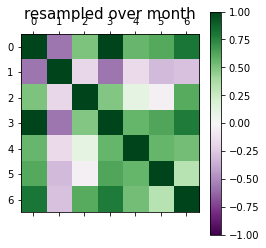

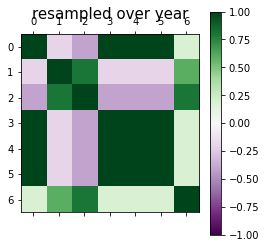

In [ ]:
# Correlations of mean of features resampled over months
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

In [ ]:
#LSTM::
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(24756, 7)

In [ ]:
## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...  var6(t-1)  var7(t-1)   var1(t)
1   0.636816   0.276074   0.337945  ...   0.011366   0.824504  0.545045
2   0.545045   0.078322   0.335501  ...   0.144652   0.824776  0.509006
3   0.509006   0.085225   0.283802  ...   0.030869   0.815811  0.488550
4   0.488550   0.071773   0.315987  ...   0.000000   0.820701  0.455597
5   0.455597   0.073853   0.434417  ...   0.008973   0.841891  0.322555

[5 rows x 8 columns]


In [ ]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 7) (8760,) (15995, 1, 7) (15995,)


Train on 8760 samples, validate on 15995 samples
Epoch 1/20
 - 1s - loss: 0.0227 - val_loss: 0.0133
Epoch 2/20
 - 1s - loss: 0.0132 - val_loss: 0.0117
Epoch 3/20
 - 1s - loss: 0.0118 - val_loss: 0.0105
Epoch 4/20
 - 1s - loss: 0.0110 - val_loss: 0.0099
Epoch 5/20
 - 1s - loss: 0.0107 - val_loss: 0.0097
Epoch 6/20
 - 1s - loss: 0.0106 - val_loss: 0.0097
Epoch 7/20
 - 1s - loss: 0.0106 - val_loss: 0.0097
Epoch 8/20
 - 1s - loss: 0.0105 - val_loss: 0.0097
Epoch 9/20
 - 1s - loss: 0.0104 - val_loss: 0.0096
Epoch 10/20
 - 1s - loss: 0.0104 - val_loss: 0.0096
Epoch 11/20
 - 1s - loss: 0.0104 - val_loss: 0.0096
Epoch 12/20
 - 1s - loss: 0.0104 - val_loss: 0.0098
Epoch 13/20
 - 1s - loss: 0.0104 - val_loss: 0.0095
Epoch 14/20
 - 1s - loss: 0.0104 - val_loss: 0.0097
Epoch 15/20
 - 1s - loss: 0.0104 - val_loss: 0.0096
Epoch 16/20
 - 1s - loss: 0.0104 - val_loss: 0.0096
Epoch 17/20
 - 1s - loss: 0.0104 - val_loss: 0.0097
Epoch 18/20
 - 1s - loss: 0.0104 - val_loss: 0.0096
Epoch 19/20
 - 1s - loss

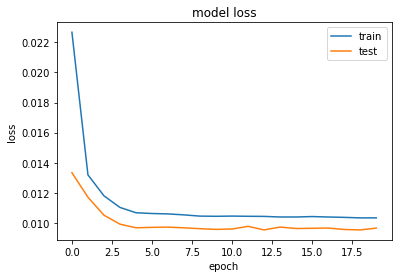

Test RMSE: 0.632


In [ ]:
#Model Architecture
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)